In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_text
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


OPIS SKUPA PODATAKA

The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [43]:
df = pd.read_csv(r'podaci\online+shoppers+purchasing+intention+dataset\online_shoppers_intention preprocessed.csv', encoding='cp1252', sep=',')
print(df.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


In [44]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [45]:
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [46]:
X = df.drop("Revenue", axis=1)
y = df["Revenue"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123, stratify=y)

Decision Tree Accuracy: 0.8588807785888077
Confusion Matrix:
[[1893  191]
 [ 157  225]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2084
           1       0.54      0.59      0.56       382

    accuracy                           0.86      2466
   macro avg       0.73      0.75      0.74      2466
weighted avg       0.86      0.86      0.86      2466



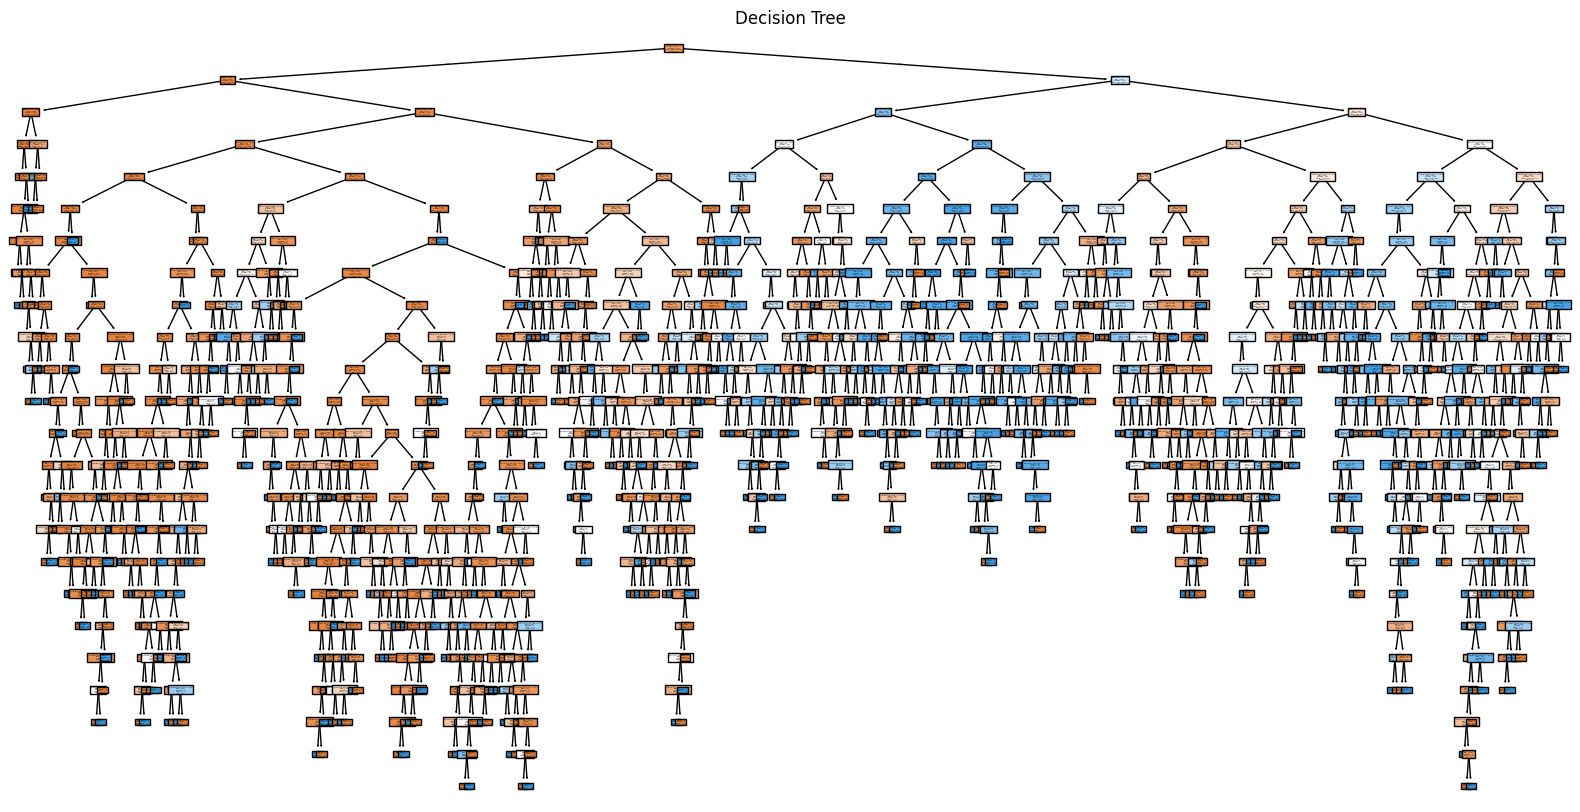

In [47]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
preds = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test,preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds))
print("\nClassification Report:")
print(classification_report(y_test, preds))

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree")
plt.show()

In [48]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

preds = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test,preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds))
print("\nClassification Report:")
print(classification_report(y_test, preds))

Random Forest Accuracy: 0.9055150040551501
Confusion Matrix:
[[2012   72]
 [ 161  221]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2084
           1       0.75      0.58      0.65       382

    accuracy                           0.91      2466
   macro avg       0.84      0.77      0.80      2466
weighted avg       0.90      0.91      0.90      2466



In [49]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
mlp.fit(X_train, y_train)
preds = mlp.predict(X_test)


print("Neural Net Accuracy:", accuracy_score(y_test,preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds))
print("\nClassification Report:")
print(classification_report(y_test, preds))

Neural Net Accuracy: 0.8961881589618816
Confusion Matrix:
[[1974  110]
 [ 146  236]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2084
           1       0.68      0.62      0.65       382

    accuracy                           0.90      2466
   macro avg       0.81      0.78      0.79      2466
weighted avg       0.89      0.90      0.89      2466



In [50]:
nb = GaussianNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)


print("Naïve Bayes Accuracy:", accuracy_score(y_test,preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds))
print("\nClassification Report:")
print(classification_report(y_test, preds))

Naïve Bayes Accuracy: 0.7931873479318735
Confusion Matrix:
[[1690  394]
 [ 116  266]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      2084
           1       0.40      0.70      0.51       382

    accuracy                           0.79      2466
   macro avg       0.67      0.75      0.69      2466
weighted avg       0.85      0.79      0.81      2466



In [51]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)


print("k-NN Accuracy:", accuracy_score(y_test,preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds))
print("\nClassification Report:")
print(classification_report(y_test, preds))

k-NN Accuracy: 0.8698296836982968
Confusion Matrix:
[[1981  103]
 [ 218  164]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2084
           1       0.61      0.43      0.51       382

    accuracy                           0.87      2466
   macro avg       0.76      0.69      0.72      2466
weighted avg       0.86      0.87      0.86      2466



In [52]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)


print("Logistic Regression Accuracy:", accuracy_score(y_test,preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds))
print("\nClassification Report:")
print(classification_report(y_test, preds))

Logistic Regression Accuracy: 0.8860502838605029
Confusion Matrix:
[[2035   49]
 [ 232  150]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2084
           1       0.75      0.39      0.52       382

    accuracy                           0.89      2466
   macro avg       0.83      0.68      0.73      2466
weighted avg       0.88      0.89      0.87      2466



In [53]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
preds = svm.predict(X_test)


print("SVM Accuracy:", accuracy_score(y_test,preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds))
print("\nClassification Report:")
print(classification_report(y_test, preds))

SVM Accuracy: 0.8933495539334956
Confusion Matrix:
[[2016   68]
 [ 195  187]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2084
           1       0.73      0.49      0.59       382

    accuracy                           0.89      2466
   macro avg       0.82      0.73      0.76      2466
weighted avg       0.88      0.89      0.88      2466



In [54]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)


print("XGBoost Accuracy:", accuracy_score(y_test,preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds))
print("\nClassification Report:")
print(classification_report(y_test, preds))

XGBoost Accuracy: 0.902676399026764
Confusion Matrix:
[[1989   95]
 [ 145  237]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2084
           1       0.71      0.62      0.66       382

    accuracy                           0.90      2466
   macro avg       0.82      0.79      0.80      2466
weighted avg       0.90      0.90      0.90      2466



c:\Users\Korisnik\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:40:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [55]:
rules = export_text(dt, feature_names = X.columns.tolist())
print("Decision Tree Rules:\n", rules)

Decision Tree Rules:
 |--- PageValues <= -0.26
|   |--- Month <= -0.34
|   |   |--- PageValues <= -0.31
|   |   |   |--- Month <= -0.63
|   |   |   |   |--- class: 0
|   |   |   |--- Month >  -0.63
|   |   |   |   |--- TrafficType <= 2.84
|   |   |   |   |   |--- Administrative_Duration <= -0.05
|   |   |   |   |   |   |--- OperatingSystems <= 1.51
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- OperatingSystems >  1.51
|   |   |   |   |   |   |   |--- ProductRelated <= -0.51
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- ProductRelated >  -0.51
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Administrative_Duration >  -0.05
|   |   |   |   |   |   |--- Administrative_Duration <= -0.03
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Administrative_Duration >  -0.03
|   |   |   |   |   |   |   |--- Administrative <= 0.36
|   |   |   |   |   |   |   |   |--- Region <= 0.15
|   |   |   |  

In [ ]:
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_oh, epochs=50, batch_size=8, verbose=0)
_, acc = model.evaluate(X_test, y_test_oh, verbose=0)
print("Deep Learning Accuracy:", acc)

Deep Learning Accuracy: 0.8872668147087097
